# Outliers

**Types of Outliers**
- Univariate (based on one variable)
- Multivariate (based on multiple variables)
- Global Outlier
- Point Outlier
- Local Outlier
- Contextual Outlier
- Collective Outlier
- Recurrent
-  Periodic

In [2]:
# Step 1: Import the required libraries
import pandas as pd
import numpy as np

# Step 2: Create the data
data = pd.DataFrame({'Age': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 50]})

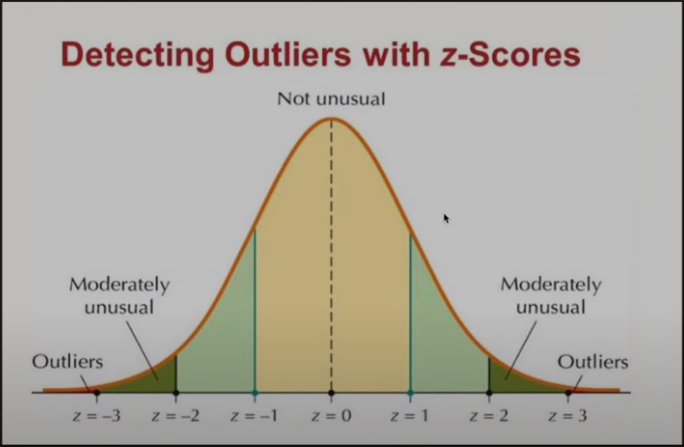

In [3]:
from IPython.display import Image, display

# Specify the path to the image file
image_path = 'C:/Desktop/Python/AI-AND-DS/images/Detecting-outlier.png'

# Display the image
display(Image(filename=image_path))


In [4]:
# Step 3: Calculate the mean and standard deviation
mean = np.mean(data['Age'])
std = np.std(data['Age'])

# Step 4: Calculate the Z-Score
data['Z-Score'] = (data['Age'] - mean) / std
data

,Age,Z-Score
0,20,-0.938954
1,21,-0.806396
2,22,-0.673838
3,23,-0.541280
4,24,-0.408721
5,25,-0.276163
6,26,-0.143605
7,27,-0.011047
8,28,0.121512
9,29,0.254070


In [5]:
# Step 5: Print the data
print("----------------------------------------")
print(f"Here is the data with outliers:\n {data}")
print("----------------------------------------")


----------------------------------------
Here is the data with outliers:
     Age   Z-Score
0    20 -0.938954
1    21 -0.806396
2    22 -0.673838
3    23 -0.541280
4    24 -0.408721
5    25 -0.276163
6    26 -0.143605
7    27 -0.011047
8    28  0.121512
9    29  0.254070
10   30  0.386628
11   50  3.037793
----------------------------------------


In [6]:
# Step 6: Print the outliers
print(f"Here are the outliers based on the z-score threshold, 3:\n {data[data['Z-Score'] > 3]}")
print("----------------------------------------")


Here are the outliers based on the z-score threshold, 3:
     Age   Z-Score
11   50  3.037793
----------------------------------------


In [7]:
# Step 7: Remove the outliers
data = data[data['Z-Score'] <= 3]

# Step 8: Print the data without outliers
print(f"Here is the data without outliers:\n {data}")

Here is the data without outliers:
     Age   Z-Score
0    20 -0.938954
1    21 -0.806396
2    22 -0.673838
3    23 -0.541280
4    24 -0.408721
5    25 -0.276163
6    26 -0.143605
7    27 -0.011047
8    28  0.121512
9    29  0.254070
10   30  0.386628


# Another way to check and remove Outliers by SCIPY Library

In [8]:
# Import libraries
import numpy as np
from scipy import stats

# Sample data
data = [2.5, 2.7, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 110.0]

# Calculate the Z-score for each data point
z_scores = np.abs(stats.zscore(data))

# Set a threshold for identifying outliers
threshold = 2.5 
outliers = np.where(z_scores > threshold)[0]

# print the data
print("----------------------------------------")
print("Data:", data)
print("----------------------------------------")

print("Indices of Outliers:", outliers)
print("Outliers:", [data[i] for i in outliers])

# Remove outliers
data = [data[i] for i in range(len(data)) if i not in outliers]
print("----------------------------------------")
print("Data without outliers:", data)

----------------------------------------
Data: [2.5, 2.7, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 110.0]
----------------------------------------
Indices of Outliers: [9]
Outliers: [110.0]
----------------------------------------
Data without outliers: [2.5, 2.7, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0]


# IQR Method to remove outliers

In [11]:
# Step 1: Import the required libraries
import pandas as pd
import numpy as np

# Step 2: Create the data
data = pd.DataFrame({'Age': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 50]})

# Step 3: Calculate the first and third quartile
Q1 = np.percentile(data['Age'], 25, interpolation = 'midpoint')
Q3 = np.percentile(data['Age'], 75, interpolation = 'midpoint')

# Step 4: Calculate the IQR
IQR = Q3 - Q1

# Step 5: Calculate the lower and upper bound
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Step 6: Print the data
print("----------------------------------------")
print(f"Here is the data with outliers:\n {data}")
print("----------------------------------------")
# Step 7: Print the outliers
print(f"Here are the outliers based on the IQR threshold:\n {data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]}")
print("----------------------------------------")
# Step 8: Remove the outliers
data = data[(data['Age'] >= lower_bound) & (data['Age'] <= upper_bound)]

# Step 9: Print the data without outliers
print(f"Here is the data without outliers:\n {data}")

----------------------------------------
Here is the data with outliers:
     Age
0    20
1    21
2    22
3    23
4    24
5    25
6    26
7    27
8    28
9    29
10   30
11   50
----------------------------------------
Here are the outliers based on the IQR threshold:
     Age
11   50
----------------------------------------
Here is the data without outliers:
     Age
0    20
1    21
2    22
3    23
4    24
5    25
6    26
7    27
8    28
9    29
10   30


# K-means Cluster ot check and remove Outliers

In [12]:
# Import library
from sklearn.cluster import KMeans

# Sample data
data = [[2, 2], [3, 3], [3, 4], [30, 30], [31, 31], [32, 32]]

# Create a K-means model with two clusters (normal and outlier)
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(data)

# Predict cluster labels
labels = kmeans.predict(data)

# Identify outliers based on cluster labels
outliers = [data[i] for i, label in enumerate(labels) if label == 1]

# print data
print("Data:", data)
print("Outliers:", outliers)
# Remove outliers
data = [data[i] for i, label in enumerate(labels) if label == 0]
print("Data without outliers:", data)

Data: [[2, 2], [3, 3], [3, 4], [30, 30], [31, 31], [32, 32]]
Outliers: [[30, 30], [31, 31], [32, 32]]
Data without outliers: [[2, 2], [3, 3], [3, 4]]
